# Data Science 100 Project: Planning Stage (Individual) Amanda Huang

In [1]:
#Loading the relevant R package:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Data Description

Minecraft is a 2011 sandbox game developed and published by Swedish video game developer Mojang Studios(Wikipedia contributors, 2025). And it has since been an iconic video game among many young people, ranking number 3 wolrdwide today. 

This study uses data from a UBC Computer Science research group led by Frank Wood. They had set up a MineCraft server, and recorded various player actions data as the players navigate through the server. The data contain information on the player's skill level, demographic, and play sessions. 

 #### The data consists of two files:
   1. **players.csv**: a list of data of all unique players
   2. **sessions.csv**: a list of individual play sessions by each player. 

#### Descriptions for the `players.csv` file:

- Number of variables: **7**
- Number of observations: **195**
1. `experience` -the level of experience of the player (Beginner (least experienced), Amateur, Regular, Veteran, Pro (most experienced))
2. `subscribe`- whether subscribed to a game newsletter or not (True, or False)
3. `hashedEmail`- private personal Email information
4. `played_hours`- the number of hours played by the player (hours)
5. `name`- the player’s name
6. `gender`- gender (male, female, non-binary, agender, two-spirited, prefer not to say)
7. `age`- age (years)


#### Descriptions for the `sessions.csv` file:

- Number of variables: **5**
- Number of observations: **1534**
1. `hashedEmail` -private personal Email information
2. `start_time`- start time, human-readable timestamp (date and time)
3. `end_time`- end time, human-readable timestamp (date and time)
4. `original_start_time`- 
5. `original_end_time`- 

In [ ]:
#reading the files
players<- read_csv("https://raw.githubusercontent.com/AmandaH06/Group-Project-Individual/refs/heads/main/data/players.csv")
sessions<- read_csv("https://raw.githubusercontent.com/AmandaH06/Group-Project-Individual/refs/heads/main/data/sessions.csv")

#### Issues in the data


In `players.csv`:
- There are missing values `NA` for variable `Age`, which may interfere with future data wrangling and analysis.
- There are many players with 0.0 played_hours, which are not very helpful data in analysing trends (visualizations).

In `sessions.csv`:
- Some hashed Emails appears to be duplicates, which could mean there are multiple observations (rows) for one person. Further data wrangling will be needed.

#### Indirect issues in the data

- Whether the data collection method is replicable and consistent.
- The player’s `experience` is not 100% reliable as respondents could lie.
- Bias in data collection (data only collected from mostly Canada, North America).

## Question

**Broad Question**: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

**Specific Question**: Can a player’s age and played hours predict their state of subscribing to a game-related newsletter?
- Only the players.csv file will be required to answer the above predictive question. 

## Exploratory Data Analysis and Visualization

1. The two data sets have been downloaded and read using the function `read_csv(URL)`

average_played_hours,average_age
<dbl>,<dbl>
5.904639,20.52062


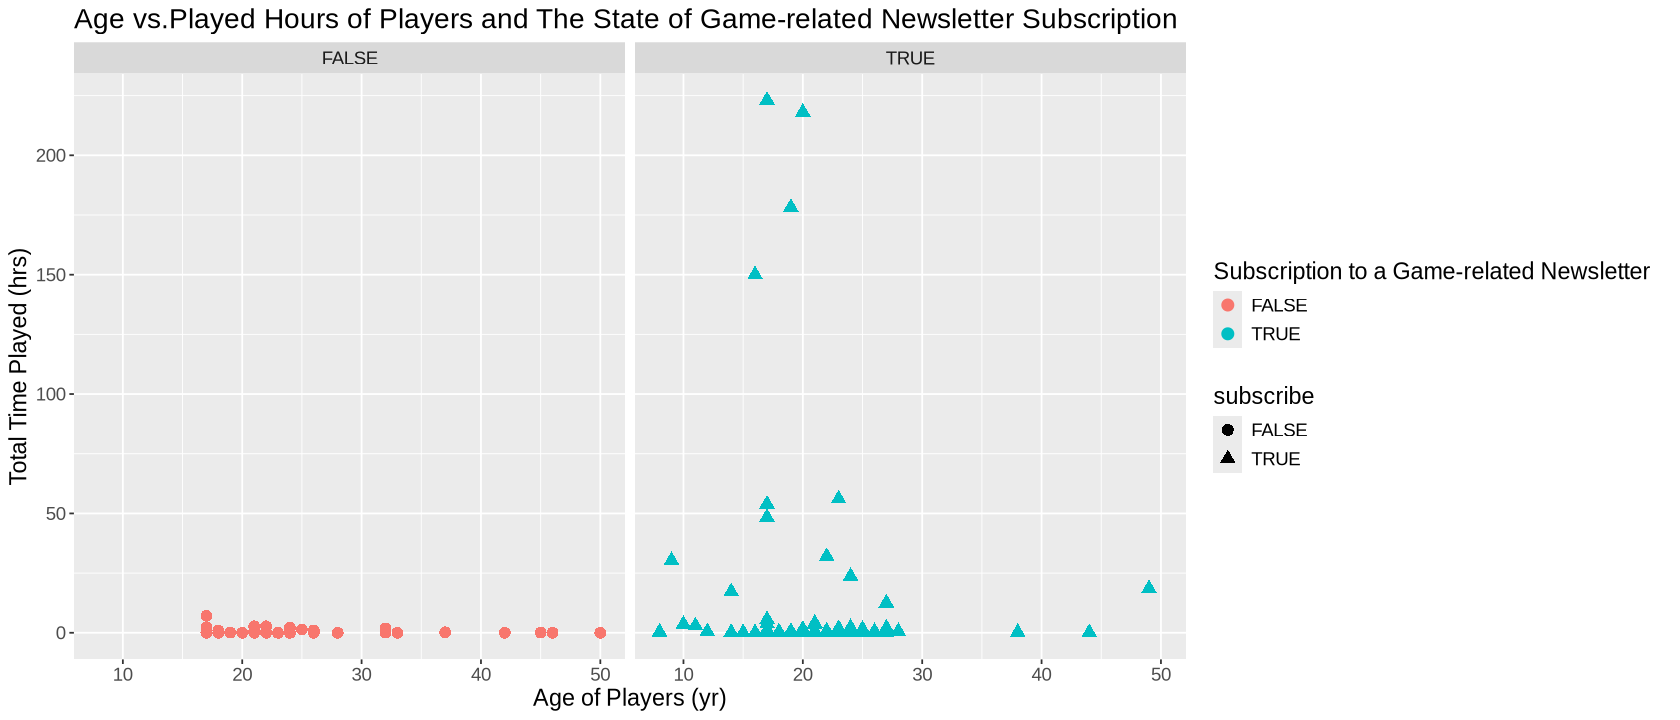

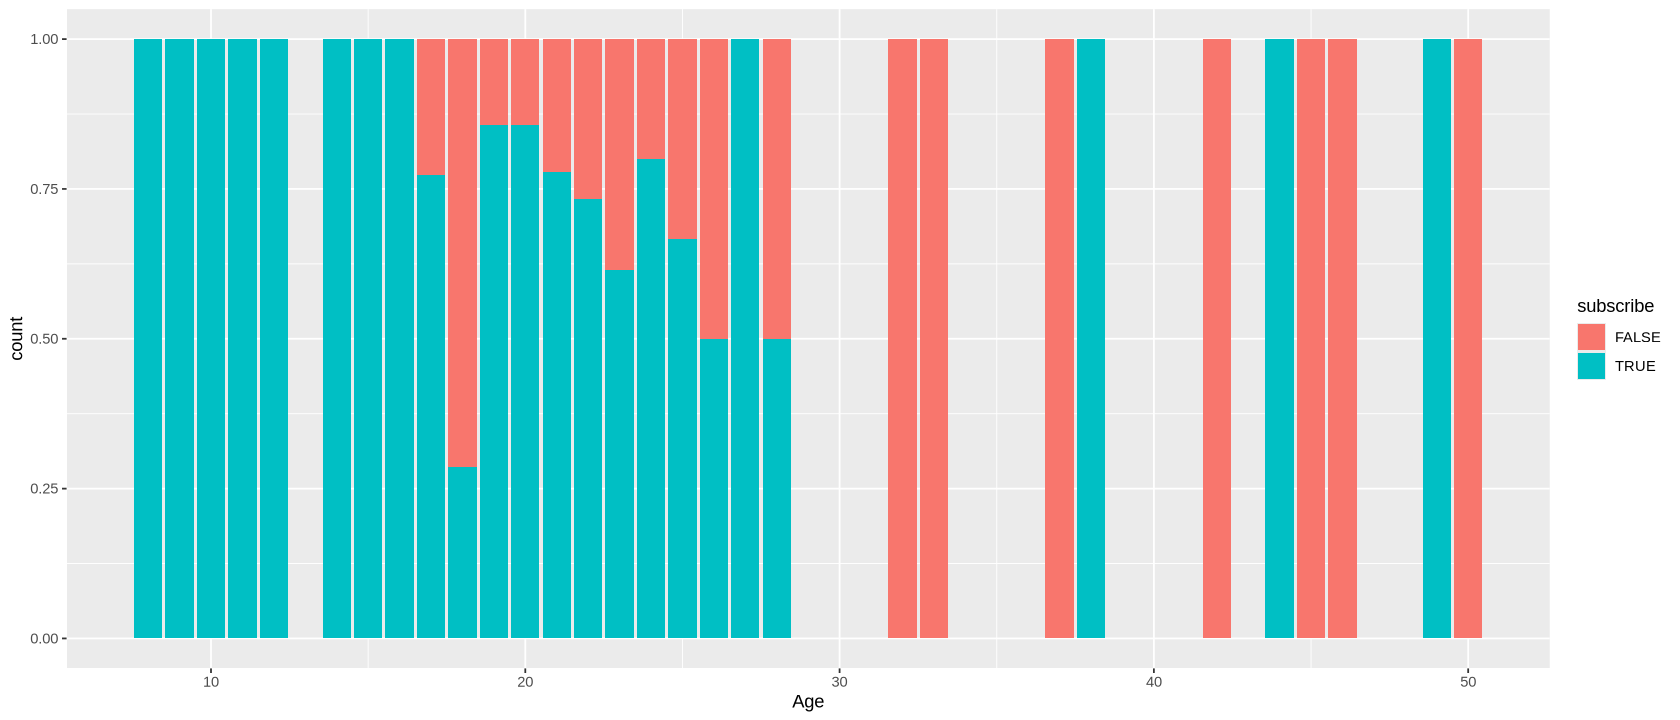

In [65]:
# 2. Cleaning and wrangling players.csv 
players_cleaned <- players|>
                   filter(Age != "NA")|>
                   mutate(subscribe = as.factor(subscribe))

# 3. Summary statistics (mean values for each numerical variables)
players_average <- players_cleaned |>
                   summarize(average_played_hours = mean(played_hours), average_age = mean(Age))
players_average

# 4. Exploratory visualizations
options(repr.plot.width = 14, repr.plot.height = 6)
scatterplot <- players_cleaned|>
ggplot(aes(x = Age, y = played_hours, colour = subscribe, shape = subscribe))+
geom_point(size = 3)+
labs(x = "Age of Players (yr)", y = "Total Time Played (hrs)", colour = "Subscription to a Game-related Newsletter", 
     Shape = "Subscription to a Game-related Newsletter")+
ggtitle("Age vs.Played Hours of Players and The State of Game-related Newsletter Subscription")+
theme(text = element_text(size = 14))+
facet_grid(cols = vars(subscribe))
scatterplot

bar_graph <- players_cleaned|>
ggplot(aes(x = Age, fill = subscribe))+
geom_bar(position = "fill")
bar_graph

**Explanations**:

2. The missing values NA for variable Age has been removed, this would not greatly impact future analysis as there is only one row with missing value. Variable `subscribe` is converted to factor, so R can treat it as categories and assigns different colors, shapes.
3. The average of the two quantitative variables `Age` and `played_hours` were calculated and summarized into a table using function `summerize()`
4. Scatterplots were produced to observe any relationship between the two predictor variables (Age & played_hours). There are no clear relationship between Age and played_hours. Addtionally, the scatterplot was split into two plots of subscribed, and unsubscribed groups. This is to obtain a rought idea of what ranges of Age and played_hours have the highest number of subscribed individuals.

## Methods and Plan

#### Method to use: Classification by K-nearest neighbors (KNN) classification algorithms
Why choose this method?
- Classification is appropriate for this predictive question as the question requires using given data on `played_hours` and `Age` to determine the class `subscribe` of a new sample.
- KNN classification algorith does not require specific data or shape assumptions for the algorithm to perform well, since it is based on how close a new sample is to nearby points.
  
Potential Limitations:

- KNN is very sensitive to scaling. If the ranges of values for `played_hours` and `Age` differ by a lot, biased neighbors will be chosen due to biased Euclidean distance, thus resulting in inaccurate prediction.
- Imbalance. If there are a lot more subscribed observations than unsubscribed, KNN will more likely to classify any new observations as subscribe, which is inaccurate.

Model Application:

- The function `initial_split()` from `rsample` will be sued to split the dataframe into 75% training and 25% testing data, stratifying for `subscribe`. Only the training set will be used for analysis. The data need to be splitted before applying KNN analysis so the testing data will be "untouched". 
- Model comparison and selection will be done through cross-validation.
- Cross-validation will be used to asses the model's performance. The k-folds will likely be 5, or 10-folds. Additionally, tuning the model to determine the best K value will help maximize the accuracy of the classifier on new observations.